In [22]:
import FinanceDataReader as fdr
from pykrx import stock
import pandas_datareader.data as pdr
import yfinance as yf

In [30]:
from pykrx import stock
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr

# 시작일과 종료일 설정
start_date = "2000-01-01"
end_date = "2024-10-31"

# pykrx로 상장된 종목코드와 이름 가져오기
tickers = stock.get_market_ticker_list(market="KOSPI")
ticker_info = {ticker: stock.get_market_ticker_name(ticker) for ticker in tickers}

# 데이터프레임 초기화
stock_data_list = []

# 각 종목의 주식 데이터 가져오기 (pykrx 사용)
for ticker, name in ticker_info.items():
    try:
        # 특정 종목의 주식 데이터 가져오기
        df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
        
        # 필요한 정보만 추출
        df_krx = df_krx[['종가']].reset_index()
        df_krx['ticker'] = ticker
        df_krx['name'] = name
        df_krx.rename(columns={'종가': 'close', '날짜': 'date'}, inplace=True)

        # 결과를 리스트에 추가
        stock_data_list.append(df_krx)

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")

# 모든 데이터를 하나의 데이터프레임으로 결합
if stock_data_list:
    df_stock_data = pd.concat(stock_data_list, ignore_index=True)
else:
    df_stock_data = pd.DataFrame(columns=['date', 'ticker', 'name', 'close'])

# 고유 종목 코드와 종목명만 확인
unique_stocks = df_stock_data[['ticker', 'name']].drop_duplicates().reset_index(drop=True)

# 종목 코드와 이름 간략 조회
print("코스피 종목 코드 및 이름 조회:")
print(unique_stocks)

# 데이터프레임의 간단한 요약 정보 확인
df_summary = df_stock_data.describe(include='all')
print("\n데이터프레임 요약 정보:")
print(df_summary)

# 코스피 지수 데이터를 가져와 데이터프레임으로 저장
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()
# 인덱스 초기화를 하지 않고 유지합니다 (시계열 분석을 위해 날짜 인덱스 유지)
print("\n코스피 지수 종가 데이터:")
print(kospi_index)


코스피 종목 코드 및 이름 조회:
     ticker     name
0    095570   AJ네트웍스
1    006840    AK홀딩스
2    027410      BGF
3    282330   BGF리테일
4    138930  BNK금융지주
..      ...      ...
953  079980      휴비스
954  005010      휴스틸
955  000540     흥국화재
956  000545    흥국화재우
957  003280     흥아해운

[958 rows x 2 columns]


C:\TempFolder\ipykernel_41452\921778794.py:49: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_summary = df_stock_data.describe(include='all')



데이터프레임 요약 정보:
                       date         close   ticker     name
count               4564016  4.564016e+06  4564016  4564016
unique                 6126           NaN      958      958
top     2024-10-07 00:00:00           NaN   004450     삼화왕관
freq                    958           NaN     6126     6126
first   2000-01-04 00:00:00           NaN      NaN      NaN
last    2024-10-31 00:00:00           NaN      NaN      NaN
mean                    NaN  7.164408e+04      NaN      NaN
std                     NaN  2.186518e+06      NaN      NaN
min                     NaN  2.000000e+01      NaN      NaN
25%                     NaN  2.975000e+03      NaN      NaN
50%                     NaN  8.391000e+03      NaN      NaN
75%                     NaN  2.835000e+04      NaN      NaN
max                     NaN  5.643575e+08      NaN      NaN

코스피 지수 종가 데이터:
코스피              종가
날짜                 
2000-01-04  1059.04
2000-01-05   986.31
2000-01-06   960.79
2000-01-07   948.65
2000-01-1

In [20]:
unique_stocks = df_stock_data[['ticker', 'name']].drop_duplicates().reset_index(drop=True)

print("코스피 종목 코드 및 이름 조회:")
print(unique_stocks)

df_summary = df_stock_data.describe(include='all')
print("\n데이터프레임 요약 정보:")
print(df_summary)


코스피 종목 코드 및 이름 조회:
     ticker     name
0    095570   AJ네트웍스
1    006840    AK홀딩스
2    027410      BGF
3    282330   BGF리테일
4    138930  BNK금융지주
..      ...      ...
938  005010      휴스틸
939  000540     흥국화재
940  000547  흥국화재2우B
941  000545    흥국화재우
942  003280     흥아해운

[943 rows x 2 columns]


C:\TempFolder\ipykernel_41452\1401649213.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_summary = df_stock_data.describe(include='all')


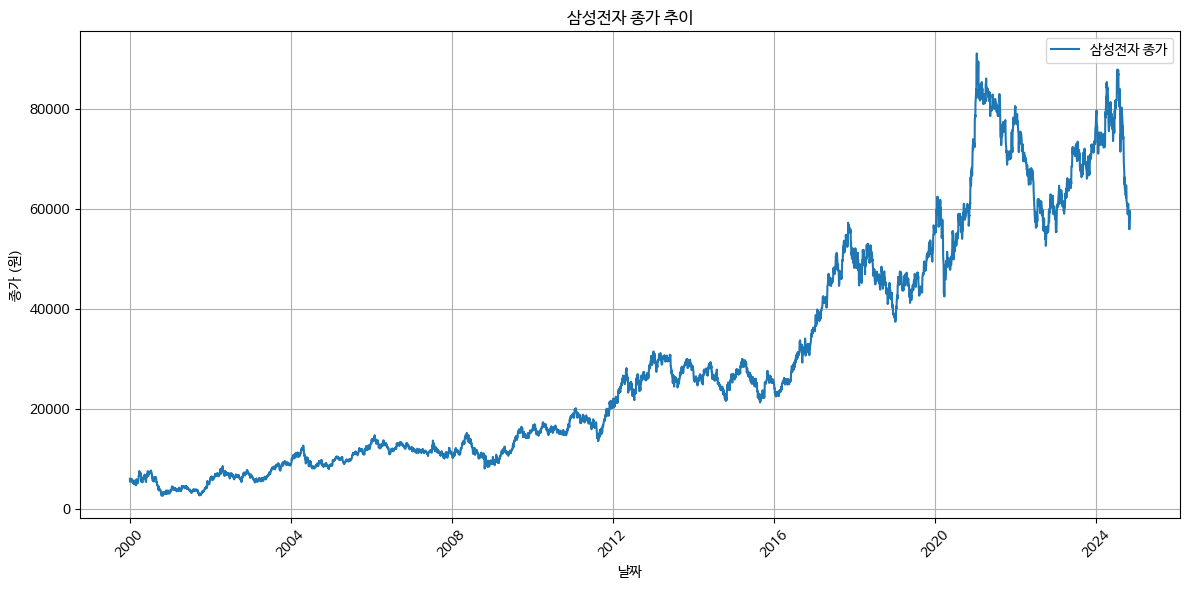

In [33]:
import matplotlib.pyplot as plt

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    df_krx = df_krx[['종가']].reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date'}, inplace=True)

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가')
    plt.title('삼성전자 종가 추이')
    plt.xlabel('날짜')
    plt.ylabel('종가 (원)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")